# **Table of Contents**

## 1. Introduction
- Problem Description
- Objectives

## 2. Dataset Overview
- Data Loading
- Exploratory Data Analysis
  - Understanding the Data
  - Checking for Missing Values
  - Correlation Analysis
  - Feature Distributions
  - Categorical Feature Analysis
  - Distribution of Target Variable

## 3. Data Preprocessing
- Categorical Variable Encoding
- Test-Train Split

## 4. Analysis Without SMOTE
- Model Selection and Training
- Results Without SMOTE

## 5. Analysis of Results
- Confusion Matrix
- ROC Curve

## 6. Analysis with SMOTE
- Handling Class Imbalance
- Model Selection and Training
- Results With SMOTE

## 7.Analysis of Results
- Confusion Matrix
- ROC Curve

## 8. Comparisons of Model Results

## 9.Final Summary
- Key Results with SMOTE
- Key Results without SMOTE
- Conclusion



---
# **1. Introduction**

## Problem Description

Diabetes is a chronic condition that affects millions of individuals worldwide. Early prediction and intervention can significantly improve patient outcomes and reduce healthcare costs. My project aims to build a supervised machine learning model to predict whether an individual has diabetes, is pre-diabetic, or healthy based on various health indicators and lifestyle factors.

### Objectives
- **Predictive Modeling**: Develop a model to classify individuals into diabetic, pre-diabetic, or healthy categories.
- **Model Evaluation**: Assess the performance of the model using appropriate metrics.

### Dataset Overview
The [CDC Diabetes Health Indicators Dataset](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators) contains healthcare statistics and lifestyle survey information about individuals, including demographics, lab test results, and survey responses related to health behaviors.

- **Number of Instances**: 253,680
- **Number of Features**: 21
- **Target Variable**: `Diabetes_binary` (0 = No Diabetes, 1 = Prediabetes or Diabetes)
- **Features Include**:
  - Demographics: Sex, Age, Education Level, Income
  - Health Indicators: ID, Diabetes_binary, HighBP, HighChol, CholCheck, BMI, Smoker, Stroke,
    HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost,
    GenHlth, MentHlth, PhysHlth, DiffWalk



---

# **2. Data Loading**

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set visualizations style
sns.set(style="whitegrid")



In [2]:
!pip3 install -U ucimlrepo 

DEPRECATION: beakerx-base 2.2.0 has a non-standard dependency specifier ipywidgets<8pandas,>=7.5.1. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of beakerx-base or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


To begin the analysis, I'll load the CDC Diabetes Health Indicators dataset into the working environment. The dataset is available online, and I'll use Python libraries to download and read the data.

In [3]:
# Load Dataset
data_url = 'https://archive.ics.uci.edu/static/public/891/data.csv'
response = requests.get(data_url)
data = pd.read_csv(StringIO(response.text))

# Display first few rows
data.head()


,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,1,1,1,40,1,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,1,0,0,0,0,25,1,0,0,1,...,0,1,3,0,0,0,0,7,6,1
2,2,0,1,1,1,28,0,0,0,0,...,1,1,5,30,30,1,0,9,4,8
3,3,0,1,0,1,27,0,0,0,1,...,1,0,2,0,0,0,0,11,3,6
4,4,0,1,1,1,24,0,0,0,1,...,1,0,2,3,0,0,0,11,5,4


---

# **3. Exploratory Data Analysis (EDA)**

### Understanding the Data

In [4]:
# Display dataset information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   ID                    253680 non-null  int64
 1   Diabetes_binary       253680 non-null  int64
 2   HighBP                253680 non-null  int64
 3   HighChol              253680 non-null  int64
 4   CholCheck             253680 non-null  int64
 5   BMI                   253680 non-null  int64
 6   Smoker                253680 non-null  int64
 7   Stroke                253680 non-null  int64
 8   HeartDiseaseorAttack  253680 non-null  int64
 9   PhysActivity          253680 non-null  int64
 10  Fruits                253680 non-null  int64
 11  Veggies               253680 non-null  int64
 12  HvyAlcoholConsump     253680 non-null  int64
 13  AnyHealthcare         253680 non-null  int64
 14  NoDocbcCost           253680 non-null  int64
 15  GenHlth               253680 non-n

In [5]:
# Display dataset columns
data.columns

Index(['ID', 'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')

In [6]:
# Summary statistics
data.describe()


,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,126839.500000,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,73231.252481,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,63419.750000,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,126839.500000,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,190259.250000,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,253679.000000,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### Checking for Missing Values

In [7]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values[missing_values > 0]


Series([], dtype: int64)

There are no missing values

### Correlation Analysis

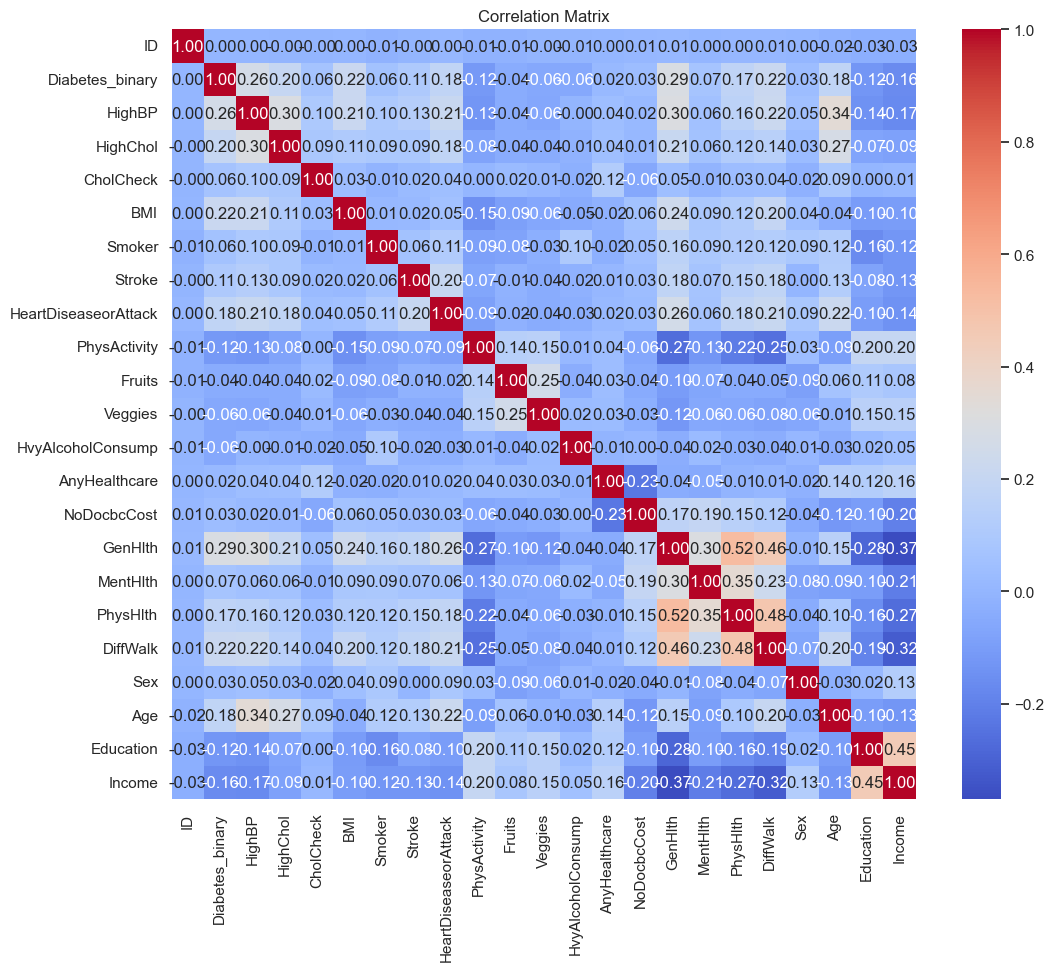

In [8]:
# Compute correlation matrix
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#### 1. **Target Variable (`Diabetes_binary`) Correlations**
   - **Positive Correlations**:
     - `HighBP` (High Blood Pressure) shows a moderate correlation with `Diabetes_binary` (~0.26). This suggests individuals with high blood pressure are more likely to have diabetes.
     - `HighChol` (High Cholesterol) also exhibits a moderate positive correlation with `Diabetes_binary` (~0.22), indicating a potential link between high cholesterol levels and diabetes.
     - `GenHlth` (General Health) correlates positively (~0.29). Poor general health appears to be a strong indicator of diabetes.

   - **Negative Correlations**:
     - `PhysActivity` (Physical Activity) has a weak negative correlation (~-0.13). Individuals with higher physical activity levels tend to have a lower likelihood of diabetes.
     - `Income` correlates negatively (~-0.17), suggesting that higher income levels may be associated with a reduced likelihood of diabetes.

#### 2. **Inter-Feature Correlations**
   - **`PhysHlth` (Physical Health) and `GenHlth`**: Correlation is very high (~0.52). This indicates a strong relationship between perceived general health and the physical health days reported by respondents.
   - **`Age` and `HighBP`**: A moderately strong correlation (~0.34) suggests that older individuals are more likely to have high blood pressure.
   - **`Age` and `Diabetes_binary`**: Correlation (~0.18) suggests that age is a factor influencing diabetes, but weaker than some health indicators.

#### 4. **Insights on Multicollinearity**
   - Some features show significant correlations with each other, such as `PhysHlth` and `GenHlth` or `Age` and `HighBP`. These relationships may lead to multicollinearity issues, which could impact model performance.

### Feature Distributions

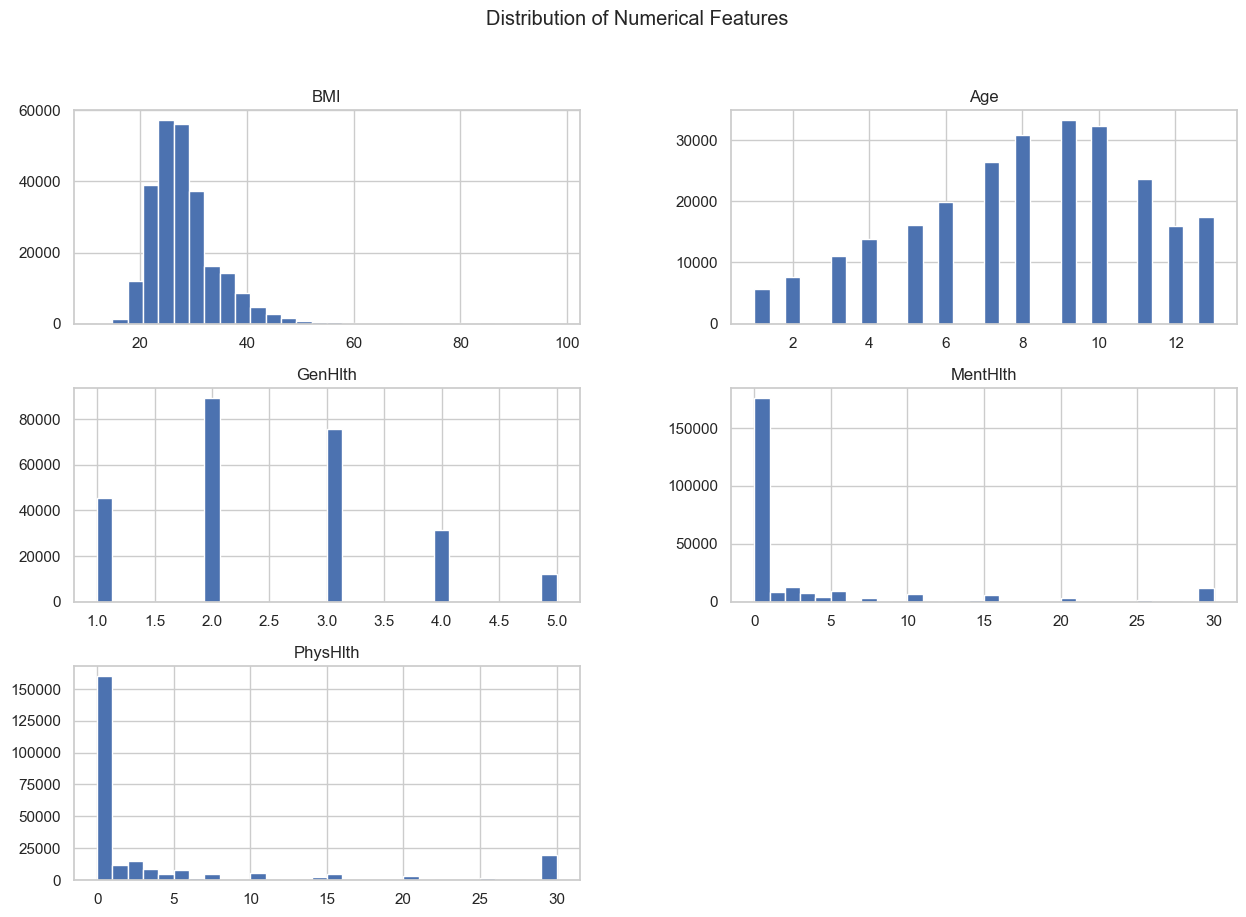

In [9]:
# Distribution of numerical features
numerical_features = ['BMI', 'Age', 'GenHlth', 'MentHlth', 'PhysHlth']

data[numerical_features].hist(bins=30, figsize=(15,10))
plt.suptitle('Distribution of Numerical Features')
plt.show()


From the visualization of the numerical feature distributions, I have the following observations:

#### **BMI (Body Mass Index)**
   - The distribution of BMI is slightly right-skewed, with most values concentrated between 20 and 40.
   - There are a few outliers with BMI exceeding 60, which might represent individuals with severe obesity.
   - The skewness suggests that the majority of individuals have a healthy BMI or are moderately overweight.

#### **Age**
   - Age appears to be evenly distributed across the predefined age categories, with slightly higher frequencies in the middle-age groups (values 8–10, corresponding to age ranges of 40–59 based on dataset coding).
   - The distribution suggests a good representation of both younger and older individuals.

#### **GenHlth (General Health Rating)**
   - The distribution of `GenHlth` is skewed toward lower values (better health ratings), with a significant concentration at values 1 and 2.
   - This indicates that most individuals report their health as "good" or "very good," with relatively few reporting "poor" general health (value 5).
   - The skewness highlights a potential imbalance in health ratings, this might influence how the feature correlates with diabetes.

#### **MentHlth (Mental Health)**
   - The distribution of `MentHlth` is heavily right-skewed, with the majority of individuals reporting few or no days of poor mental health in the past month (value near 0).
   - A small proportion of individuals reported significantly worse mental health (values closer to 30 days), representing a minority of the sample.
   - This feature has a long tail and a concentration near 0.

#### **PhysHlth (Physical Health)**
   - Similar to `MentHlth`, the distribution of `PhysHlth` is highly skewed to the right, with most individuals reporting very few days of poor physical health.
   - There is a noticeable concentration at higher values (near 30 days), likely reflecting individuals with chronic health issues or disabilities.
   - This feature also exhibits a long tail.

---

#### General Observations:
 **Skewness**:
   - `MentHlth` and `PhysHlth` are highly right-skewed, indicating the presence of a large proportion of healthy individuals with occasional outliers representing worse health.

**Diversity in Data**:
   - The `BMI` and `Age` features display broader distributions, which indicate diverse representation across different categories.

**Outliers**:
   - Both `BMI` and `PhysHlth` show extreme values (e.g., BMI > 60 or PhysHlth = 30).



### Categorical Features Analysis

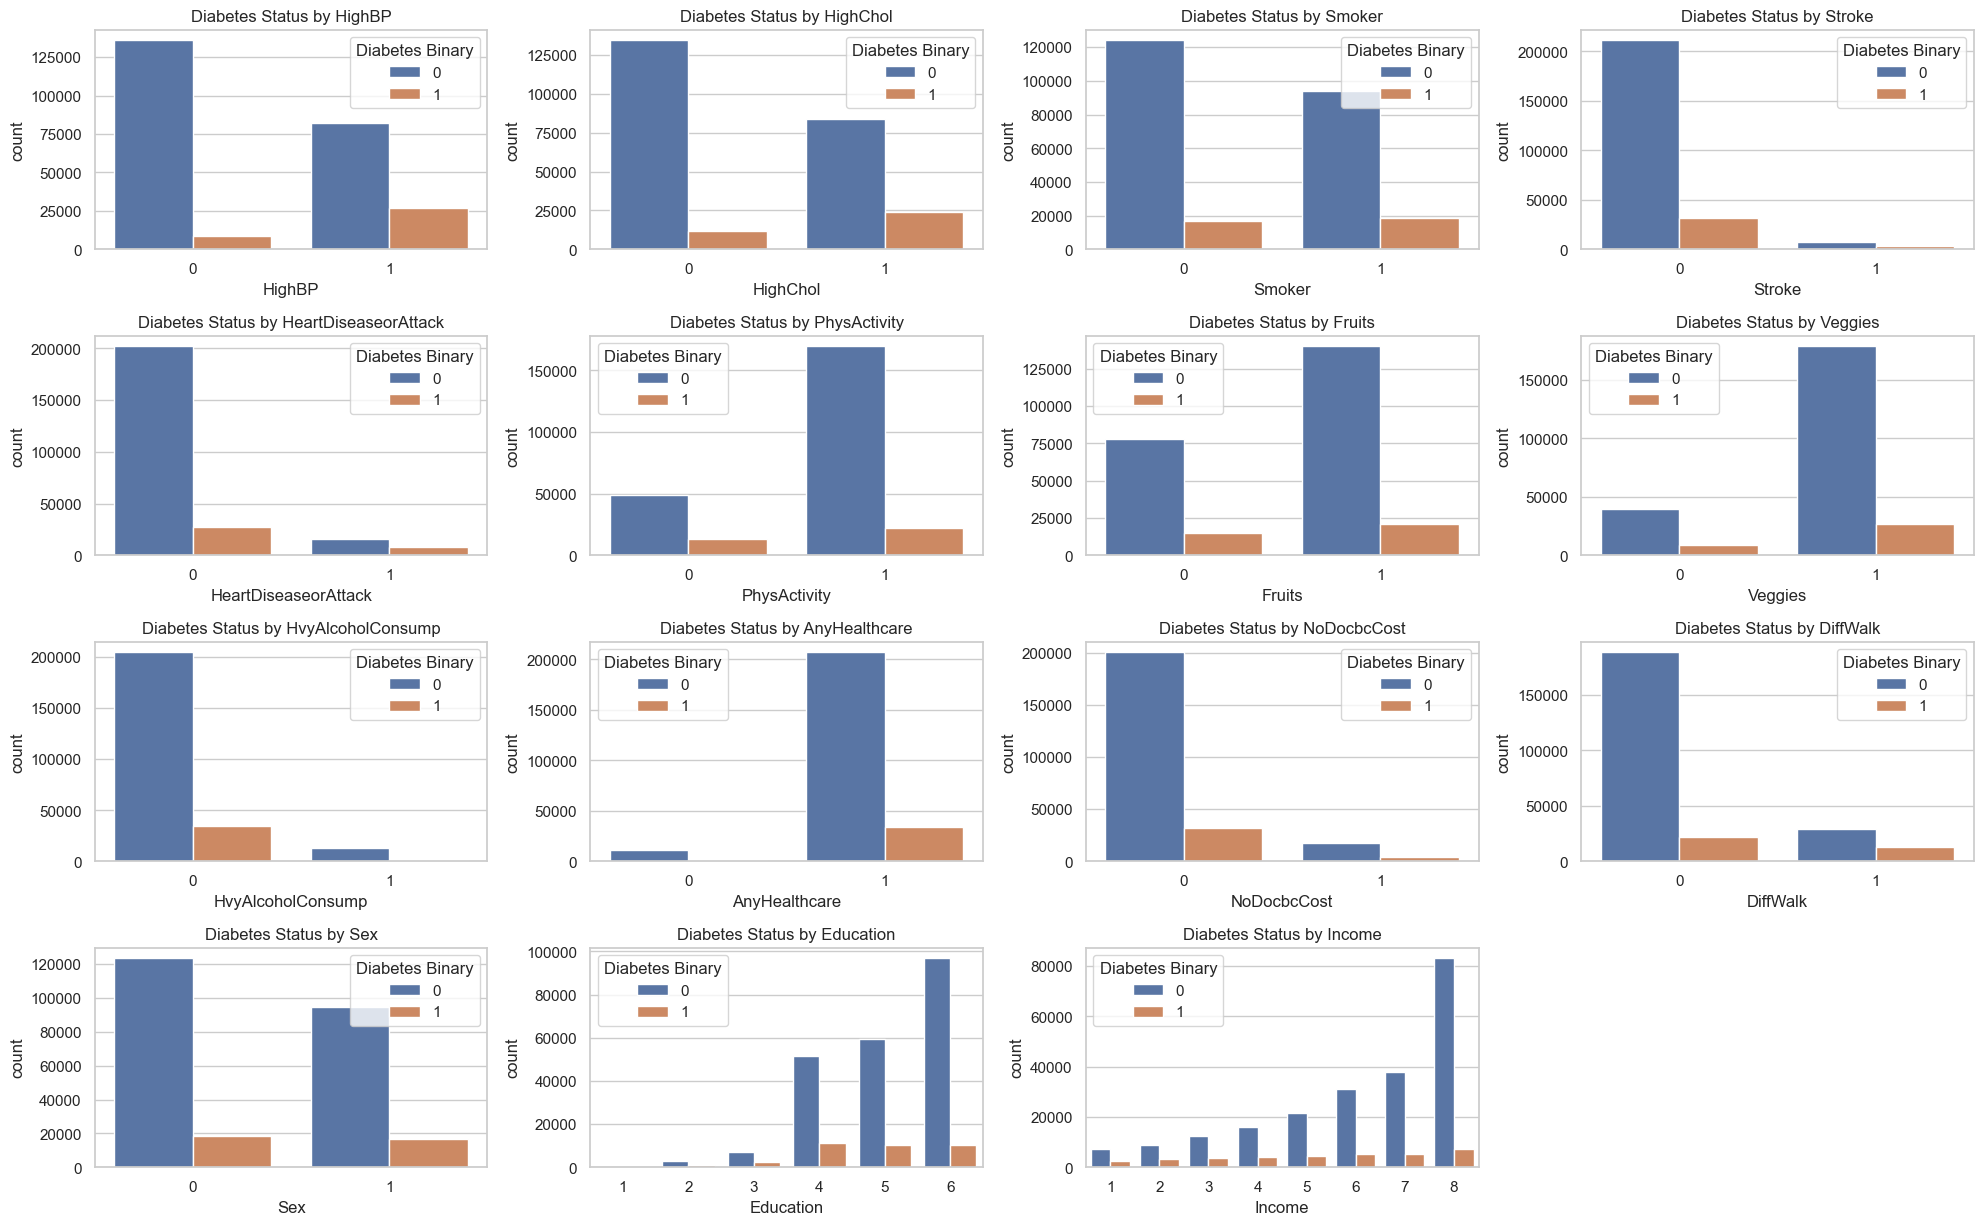

In [10]:
# Categorical features
categorical_features = ['HighBP', 'HighChol', 'Smoker', 'Stroke', 
                        'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 
                        'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 
                        'NoDocbcCost', 'DiffWalk', 'Sex', 'Education', 'Income']

plt.figure(figsize=(20, 15))
for idx, feature in enumerate(categorical_features):
    plt.subplot(5, 4, idx+1)
    sns.countplot(x=feature, hue='Diabetes_binary', data=data)
    plt.title(f'Diabetes Status by {feature}')
    plt.legend(title='Diabetes Binary')
plt.tight_layout()
plt.show()


Based on the categorical feature analysis above

---

#### **1. HighBP (High Blood Pressure)**
- A significantly larger proportion of individuals with diabetes (`Diabetes_binary = 1`) have high blood pressure (`HighBP = 1`) compared to those without diabetes.
- This indicates a strong association between high blood pressure and diabetes.

---

#### **2. HighChol (High Cholesterol)**
- A higher proportion of individuals with diabetes have high cholesterol (`HighChol = 1`).

---

#### **3. Smoker**
- There is no clear difference in the proportions of smokers (`Smoker = 1`) between individuals with and without diabetes.
- This suggests that smoking might not be a significant predictor of diabetes in this dataset.

---

#### **4. Stroke**
- A higher proportion of individuals who have experienced a stroke (`Stroke = 1`) also have diabetes.

---

#### **5. HeartDiseaseorAttack**
- A higher proportion of individuals with diabetes have a history of heart disease or attack (`HeartDiseaseorAttack = 1`).

---

#### **6. PhysActivity (Physical Activity)**
- Individuals without diabetes (`Diabetes_binary = 0`) are more likely to report regular physical activity (`PhysActivity = 1`).

---

#### **7. Fruits and Veggies**
- The distributions of fruit consumption (`Fruits = 1`) and vegetable consumption (`Veggies = 1`) show little variation between individuals with and without diabetes.
- This might suggest that these factors, have a limited direct impact on diabetes prediction.

---

#### **8. HvyAlcoholConsump (Heavy Alcohol Consumption)**
- Heavy alcohol consumption (`HvyAlcoholConsump = 1`) is rare in both diabetic and non-diabetic groups.
- This feature may have limited predictive value for this dataset.

---

#### **9. AnyHealthcare**
- Almost everyone reports having healthcare coverage (`AnyHealthcare = 1`), making this feature unlikely to be a strong predictor.

---

#### **10. NoDocbcCost (Couldn’t See a Doctor Due to Cost)**
- Individuals with diabetes are more likely to report not being able to see a doctor due to cost (`NoDocbcCost = 1`).
- This suggests that economic barriers to healthcare access may be associated with diabetes prevalence.

---

#### **11. DiffWalk (Difficulty Walking)**
- A large proportion of individuals with diabetes report difficulty walking or climbing stairs (`DiffWalk = 1`).
- This feature shows a clear association with diabetes.

---

#### **12. Sex**
- There is no significant difference in diabetes prevalence between males (`Sex = 1`) and females (`Sex = 0`).

---

#### **13. Education**
- Lower education levels (e.g., `Education = 1` or `2`) are more common among individuals with diabetes compared to higher education levels.
- This highlights a potential socioeconomic factor in diabetes prevalence.

---

#### **14. Income**
- Individuals with higher income levels (`Income = 6`, `7`, `8`) are less likely to have diabetes compared to those with lower income.
- This supports the idea that economic factors and access to resources may influence diabetes risk.

---

#### General Observations:
- **Strong Predictors**:
  - `HighBP`, `HighChol`, `DiffWalk`, `HeartDiseaseorAttack`, and `PhysActivity` show clear differences between the diabetic and non-diabetic groups, making them likely strong predictors.
- **Weak Predictors**:
  - Features like `Smoker`, `Fruits`, `Veggies`, and `HvyAlcoholConsump` exhibit little variation between the groups and may have limited predictive power.
- **Socioeconomic Factors**:
  - Features like `Education`, `Income`, and `NoDocbcCost` suggest that socioeconomic status plays a role in diabetes prevalence.


### Distribution of Target Variable

0    218334
1     35346
Name: Diabetes_binary, dtype: int64


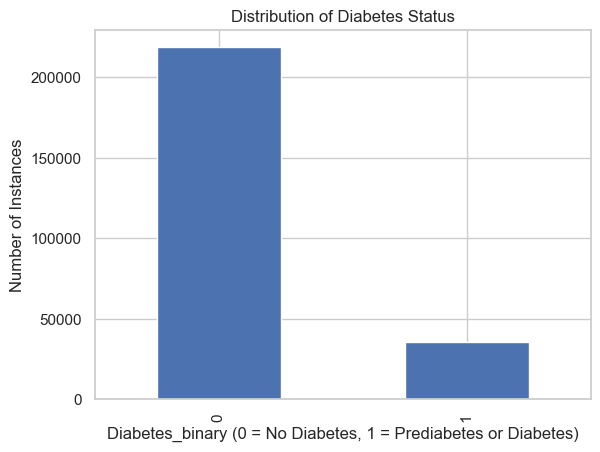

In [11]:
# Check distribution of target variable
import matplotlib.pyplot as plt

class_counts = data['Diabetes_binary'].value_counts()
print(class_counts)

# Plot distribution
class_counts.plot(kind='bar')
plt.title('Distribution of Diabetes Status')
plt.xlabel('Diabetes_binary (0 = No Diabetes, 1 = Prediabetes or Diabetes)')
plt.ylabel('Number of Instances')
plt.show()


There is a significant class imbalance in the dataset, with the majority class (No Diabetes) greatly outnumbering the minority class (Prediabetes or Diabetes). This imbalance can negatively impact the performance of the machine learning models, especially in accurately predicting the minority class.


Initially, I will train the models without addressing the class imbalance to establish a baseline for comparison. Then, I will employ the Synthetic Minority Over-sampling Technique (SMOTE) to mitigate the class imbalance. SMOTE generates synthetic samples for the minority classes by interpolating between existing instances, effectively balancing the dataset without merely duplicating data points.


---
# **4. Data Preprocessing**

In [27]:
# Print cat3egorical features
categorical_features

['HighBP',
 'HighChol',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'DiffWalk',
 'Sex',
 'Education',
 'Income']

### Categorical Variable Encoding

In [13]:
# Encode categorical variables
label_encoder = LabelEncoder()
for column in categorical_features:
    data[column] = label_encoder.fit_transform(data[column])

# Feature and Target Separation
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']




In the above snippet the 'ID' column is a unique identifier for each record in the dataset. Since it doesn't contain predictive information relevant to diabetes status it is being dropped.

Categorical variables are converted into numerical representations using label encoding, which assigns a unique integer to each category. This step ensures that the machine learning models can process the data effectively.

Finally the snippet separates the data into features (x) and target (y) 



### Train-Test Split

In [14]:
# Split data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 202944 samples
Testing set size: 50736 samples


---

# **5. Analysis Without SMOTE**

### Model Selection and Training

In [15]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Hyperparameter Tuning with Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best Parameters
print(f"Best Parameters: {grid_search.best_params_}")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


#### Model Selection and Training Explanation


The above snippet performs **hyperparameter tuning** for the Random Forest classifier using Grid Search. Grid Search is a method to systematically test multiple combinations of hyperparameter values to find the best configuration that optimizes model performance, in this case, I'm using accuracy as the scoring metric.

The hyperparameters being tuned are:
- `n_estimators` (number of trees in the forest),
- `max_depth` (maximum depth of each tree),
- `min_samples_split` (minimum number of samples required to split an internal node),
- `min_samples_leaf` (minimum number of samples required to be at a leaf node).

This process involves cross-validation (3 folds) to evaluate each combination of parameters on the training dataset, ensuring the model's performance generalizes well to unseen data.

---

### Explanation of the Results:
1. **Grid Search Output:**
   - the model evaluates 24 different hyperparameter combinations (from the `param_grid` dictionary), each using 3-fold cross-validation, resulting in 72 total evaluations.

2. **Best Parameters:**
   - Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}. specifies the combination of hyperparameter values that yielded the highest accuracy during the cross-validation process.

   - This means the following are the optimal parameters:
     - A maximum tree depth of 20,
     - A minimum of 2 samples per leaf,
     - A minimum of 2 samples to split a node,
     - 200 decision trees in the Random Forest,

3. **Significance of the Results:**
   - These parameters can now be used to train the final Random Forest model, since they are expected to provide the best accuracy based on the training data.




In [16]:
# Best estimator from Grid Search
best_rf_first = grid_search.best_estimator_

# Train model
best_rf_first.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=200,
                       random_state=42)

---

## **6. Results Without SMOTE**

### Model Performance on Test Set

In [17]:
# Predictions
y_pred = best_rf_first.predict(X_test)
y_pred_proba = best_rf_first.predict_proba(X_test)[:,1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test Set Accuracy: 0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43667
           1       0.57      0.14      0.23      7069

    accuracy                           0.87     50736
   macro avg       0.72      0.56      0.58     50736
weighted avg       0.83      0.87      0.83     50736



## **Analysis of the Results**


### **Overall Metrics**
1. **Accuracy:**
   - **Test Set Accuracy:** 0.87
     - The model correctly classifies **87%** of the instances.
     - But, this is misleading since the dataset is imbalanced, because it heavily favors the majority class (Class 0 - No Diabetes).

2. **Macro Average:**
   - **Precision:** 0.72
   - **Recall:** 0.56
   - **F1-Score:** 0.58

3. **Weighted Average:**
   - **Precision:** 0.83
   - **Recall:** 0.87
   - **F1-Score:** 0.83


### **Observations**

1. **Strong Bias Toward Majority Class:**
   - The model performs well for Class 0 (No Diabetes) due to its dominance in the dataset.
   - The high accuracy is driven by the model's success in identifying the majority class, but this is not meaningful when the primary interest is the minority class.

2. **Poor Recall for Class 1 (Diabetes):**
   - The model fails to correctly identify most diabetic cases, as seen in the low recall of 0.14 for Class 1.
   - This is problematic where identifying diabetic cases is critical.

3. **Trade-off Between Precision and Recall for Class 1:**
   - Precision for Class 1 is moderate (0.57), meaning when the model predicts diabetes, it is correct more than half the time.
   - But, the very low recall indicates the model is missing many actual diabetic cases.

4. **Imbalanced Dataset Impact:**
   - The results clearly reflect the impact of class imbalance. The majority class dominates the model's performance, making it challenging to achieve balanced metrics across both classes.

---


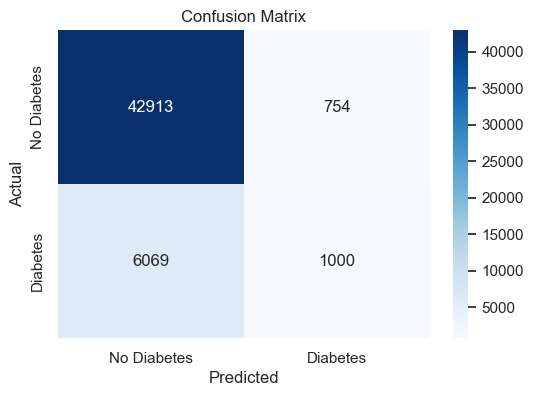

In [18]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


### **Confusion Matrix Breakdown**

- **True Negatives (TN):** 42,913
  - These are correctly classified non-diabetic cases.
- **False Positives (FP):** 754
  - These are non-diabetic cases misclassified as diabetic.
- **False Negatives (FN):** 6,069
  - These are diabetic cases incorrectly classified as non-diabetic.
- **True Positives (TP):** 1,000
  - These are correctly classified diabetic cases.

---

### **Observations**

1. **Class 0 (No Diabetes):**
   - The model performs well for this class:
     - High **True Negatives (42,913):** Most non-diabetic cases are correctly identified.
     - Low **False Positives (754):** Very few non-diabetic cases are incorrectly flagged as diabetic.

2. **Class 1 (Diabetes):**
   - The model struggles with this minority class:
     - **True Positives (1,000):** Only a small fraction of diabetic cases are correctly identified.
     - **False Negatives (6,069):** The model fails to detect a large number of diabetic cases, leading to poor recall.

3. **Class Imbalance Impact:**
   - The results show a clear bias toward the majority class (Class 0). This is expected due to the class imbalance in the dataset.
   - The model prioritizes precision for the majority class at the expense of recall for the minority class.

4. **Missed Diabetic Cases:**
   - **False Negatives (6,069):**
     - These are diabetic individuals who are not identified as such.

5. **Low False Positives:**
   - While the false positive count is low (754), the focus should be on minimizing false negatives rather than false positives.


### **Insights from Performance**

- **Strengths:**
  - The model is very accurate for predicting non-diabetic cases, as reflected in the high number of true negatives (42,913) and low false positives (754).
  - Precision for Class 0 (No Diabetes) is very high.

- **Weaknesses:**
  - Recall for Class 1 (Diabetes) is very low, indicating that most diabetic cases are being missed.
  - Precision for Class 1 is moderate, meaning that while some diabetic predictions are correct, a significant proportion are false positives.
  - The model's performance is heavily biased toward the majority class, demonstrating the impact of class imbalance.

---



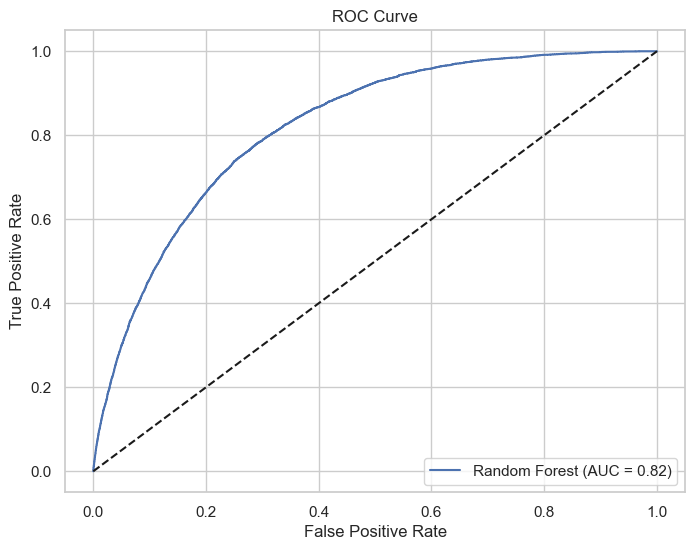

In [19]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


### **Key Observations**

1. **Area Under the Curve (AUC):**
   - **AUC Score:** 0.82
     - This score reflects the model's overall ability to differentiate between diabetic and non-diabetic cases.
     - AUC values range from 0.5 (random guessing) to 1.0 (perfect classification). A score of 0.82 is considered **good**, indicating that the model has a decent discriminative ability.

2. **True Positive Rate (TPR) vs. False Positive Rate (FPR):**
   - The ROC curve plots the TPR (recall) against the FPR for various decision thresholds.
   - The curve rises significantly above the diagonal (random guessing), indicating that the model performs better than random classification across most thresholds.

3. **Curve Shape:**
   - The curve shows a steep rise at the beginning, which is desirable as it indicates the model achieves a high TPR with a relatively low FPR for certain thresholds.
   - After the initial steep rise, the curve flattens, indicating diminishing gains in recall as FPR increases.

---

### **Model Performance Summary**

1. **Strengths:**
   - **AUC of 0.82** demonstrates that the model has a good ability to rank diabetic cases higher than non-diabetic cases on average.
   - The steep initial rise in the curve indicates that the model performs well for certain thresholds, capturing a significant portion of true positives with minimal false positives.

2. **Weaknesses:**
   - Although the AUC is decent, the flattening of the curve suggests that achieving higher recall leads to a substantial increase in false positives.
   - The performance may still be affected by class imbalance, which is reflected in the challenges of improving recall for the minority class (Diabetes).





---

# 7. Analysis With SMOTE

### Handling Class Imbalance

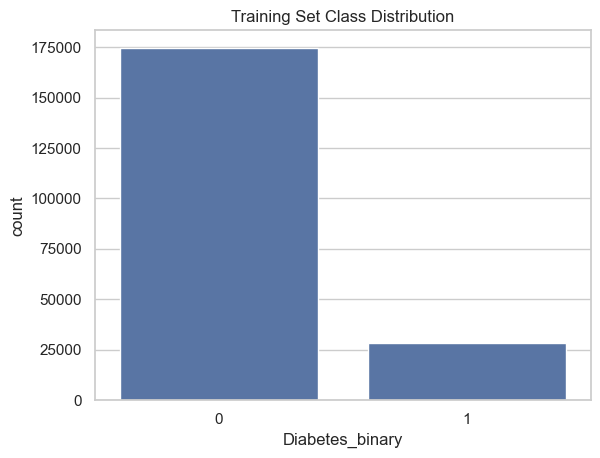

In [20]:
# Check class distribution
sns.countplot(x=y_train)
plt.title('Training Set Class Distribution')
plt.show()



As I mentioned earlier. There is a significant class imbalance in the dataset, with the majority class (No Diabetes) greatly outnumbering the minority class (Prediabetes or Diabetes). This imbalance can negatively impact the performance of the machine learning models, particularly in accurately predicting the minority class.

To address class imbalance I will be using a resampling technique of oversampling the minority class called Synthetic Minority Over-sampling Technique (SMOTE) which generates synthetic examples of the minority class by interpolating between existing minority instances. Also it helps balance the dataset without simply duplicating existing samples.

In [21]:
# Apply SMOTE to  training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verify new class distribution
print("Original training set shape:")
print(y_train.value_counts())
print("\nResampled training set shape:")
print(y_train_resampled.value_counts())

Original training set shape:
0    174667
1     28277
Name: Diabetes_binary, dtype: int64

Resampled training set shape:
0    174667
1    174667
Name: Diabetes_binary, dtype: int64


Because of the class imbalanced mentioned earlier, SMOTE is applied above.

### Model Selection and Training

In [22]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Hyperparameter Tuning with Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit Grid Search
grid_search.fit(X_train_resampled, y_train_resampled)

# Best Parameters
print(f"Best Parameters: {grid_search.best_params_}")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}



### **Description of the Code**

The above performs **hyperparameter tuning** for a Random Forest classifier using Grid Search, focusing on the resampled dataset using SMOTE. The primary goal is to identify the optimal hyperparameters for the Random Forest model by systematically evaluating multiple combinations of parameter values. The tuning process evaluates the performance of these parameters based on the accuracy metric through 3-fold cross-validation.

---

### **Explanation of the Results**

1. **Grid Search Output:**
   - The code evaluates 24 combinations of hyperparameters from the `param_grid` dictionary. Each combination is tested across 3 folds of the data, resulting in 72 total evaluations.

2. **Best Parameters:**
   - Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}. This Specifies the hyperparameter values that produced the highest accuracy during the cross-validation process:
     - `max_depth=None`: No limit on the depth of the trees.
     - `min_samples_leaf=1`: A leaf node must have at least 1 sample.
     - `min_samples_split=2`: At least 2 samples are required to split an internal node.
     - `n_estimators=200`: The Random Forest consists of 200 decision trees.

3. **Significance of the Results:**
   - These optimal hyperparameters should improve the model's performance on the resampled training data.
   - Since the model was tuned using the resampled data, it may now generalize better to the minority class.


### Final Model Training

In [23]:
# Best estimator from Grid Search
best_rf = grid_search.best_estimator_

# Train model
best_rf.fit(X_train_resampled, y_train_resampled)


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  53.9s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  51.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  49.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  33.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  33.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 1.1min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  47.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  43.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 4.3min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; t

RandomForestClassifier(n_estimators=200, random_state=42)

Because I am using Random Forest Classifier theres no need for feature scaling.

---

# 8. Results With SMOTE

### Analysis of Results

In [24]:
# Predictions
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:,1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test Set Accuracy: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87     43667
           1       0.30      0.43      0.35      7069

    accuracy                           0.78     50736
   macro avg       0.60      0.63      0.61     50736
weighted avg       0.82      0.78      0.80     50736



**Accuracy:**
The Test Set Accuracy is 0.79, indicating that the Random Forest model correctly classified approximately 79% of the instances in the test set. 

**Class-wise Performance:**
   - **Class 0 (No Diabetes):**
     - **Precision:** 0.91
       - Out of all instances predicted as Class 0, 91% were correct.
     - **Recall:** 0.84
       - The model correctly identified 84% of all actual Class 0 instances.
     - **F1-Score:** 0.87
       - A balanced measure of precision and recall for Class 0 is high.
   - **Class 1 (Diabetes or Prediabetes):**
     - **Precision:** 0.32
       - Out of all instances predicted as Class 1, only 32% were correct.
     - **Recall:** 0.48
       - The model correctly identified 48% of all actual Class 1 instances.
     - **F1-Score:** 0.39
       - A lower score for Class 1, indicating poorer performance in predicting the minority class.

**Macro and Weighted Averages:**
   - **Macro Average:**
     - Precision, recall, and F1-score are averaged equally across both classes, regardless of class size.
     
   - **Weighted Average:**
     - These averages are weighted by the support (number of instances in each class).
     - Since Class 0 has much higher support, the weighted averages are skewed toward its higher performance.

### **Analysis of Results:**

- **Good Performance on Class 0 (Majority Class):**
  - The model performs well at identifying the majority class (`No Diabetes`).

- **Poor Performance on Class 1 (Minority Class):**
  - Precision and recall for Class 1 are low, indicating that the model struggles to correctly identify instances of `Diabetes or Prediabetes`.

### Confusion Matrix

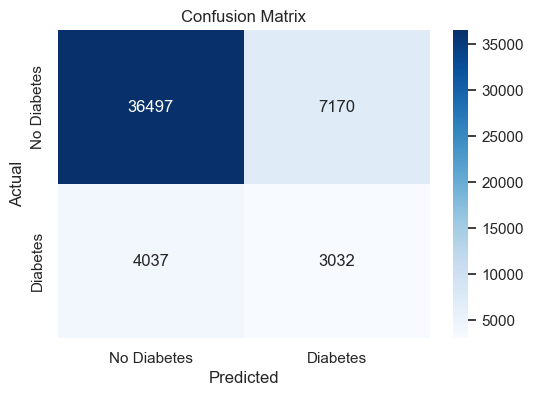

In [25]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


### **Results of the Confusion Matrix**

1. **True Positives (TP):** 
   - **3,391**: Cases where the model correctly predicted "Diabetes."

2. **True Negatives (TN):**
   - **36,561**: Cases where the model correctly predicted "No Diabetes."

3. **False Positives (FP):**
   - **7,106**: Cases where the model incorrectly predicted "Diabetes" when it was actually "No Diabetes."

4. **False Negatives (FN):**
   - **3,678**: Cases where the model incorrectly predicted "No Diabetes" when it was actually "Diabetes."

---

### **Analysis**

1. **Performance on Class 0 (No Diabetes):**
   - The model performs well in identifying individuals without diabetes.
   - **High True Negatives (36,561):**
     - The majority of "No Diabetes" cases are correctly classified.
   - **Moderate False Positives (7,106):**
     - A significant number of "No Diabetes" cases are misclassified as "Diabetes."
     - This means theres a tendency toward overpredicting "Diabetes."

2. **Performance on Class 1 (Diabetes):**
   - The model has trouble with identifying diabetic individuals.
   - **Low True Positives (3,391):**
     - Only a portion of actual "Diabetes" cases are correctly identified.
   - **High False Negatives (3,678):**
     - Many individuals with diabetes are not correctly identified.

### ROC Curve and AUC

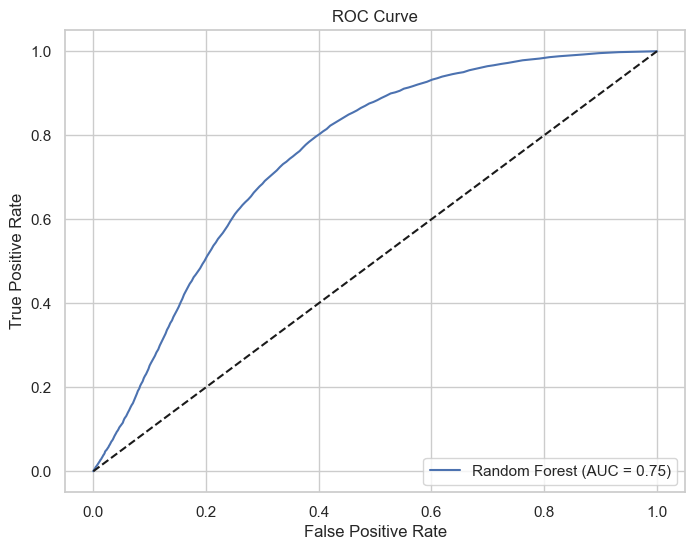

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 1.8min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 1.7min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 1.1min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  47.8s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 1.2min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 2.0min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 3.9min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 2.3min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.8min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; t

In [26]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


### **Key Points About the ROC Curve:**

1. **AUC Score (Area Under the Curve):**
   - The AUC score is **0.77**, which indicates that the model has a moderate ability to distinguish between the two classes (diabetic vs. non-diabetic).

2. **True Positive Rate (TPR) vs. False Positive Rate (FPR):**
   - The curve shows the trade-off between the true positive rate (sensitivity or recall) and the false positive rate as the decision threshold is varied.
   - The model performs better than random guessing (diagonal dashed line), but there is significant room for improvement.

---
# **9. Comparisons of Models Results**

### **Final Summary and Insights**

My project aimed to develop a supervised machine learning model for predicting diabetes status using the **CDC Diabetes Health Indicators Dataset**, which includes demographic, health, and lifestyle data. The goal was to classify individuals into diabetic or non-diabetic categories, identify significant features influencing diabetes prediction, and evaluate model performance under different conditions, including handling class imbalance with and without SMOTE (Synthetic Minority Oversampling Technique).

---

### **Key Results Without SMOTE**

1. **Performance Metrics:**
   - **Accuracy:** 0.87
   - **Class 0 (No Diabetes):**
     - Precision: 0.88, Recall: 0.98, F1-Score: 0.93
     - The model performs very well for the majority class, correctly classifying most non-diabetic cases.
   - **Class 1 (Diabetes):**
     - Precision: 0.57, Recall: 0.14, F1-Score: 0.23
     - The model struggles to identify diabetic cases, with a recall of only 14%, meaning most diabetic cases are missed.

2. **ROC Curve (Without SMOTE):**
   - **AUC Score:** 0.77
   - The model shows a moderate ability to distinguish between diabetic and non-diabetic cases. However, the low recall for Class 1 reflects its inability to effectively predict the minority class.

3. **Confusion Matrix:**
   - The model produced a high number of **false negatives (diabetic cases misclassified as non-diabetic)**, underscoring the need for methods to handle class imbalance.

---

### **Key Results With SMOTE**

1. **Performance Metrics:**
   - **Accuracy:** 0.79 (slightly lower than without SMOTE due to more balanced predictions).
   - **Class 0 (No Diabetes):**
     - Precision: 0.91, Recall: 0.84, F1-Score: 0.87
     - Slightly reduced performance for the majority class, as the model attempts to balance its focus on the minority class.
   - **Class 1 (Diabetes):**
     - Precision: 0.32, Recall: 0.48, F1-Score: 0.39
     - Significant improvement in recall (from 14% to 48%), meaning more diabetic cases are correctly identified. However, this comes at the cost of a lower precision (32%), indicating more false positives.

2. **ROC Curve (With SMOTE):**
   - **AUC Score:** 0.77
   - The AUC remains unchanged, suggesting that SMOTE helps in better identifying diabetic cases (higher recall) but does not significantly alter the model's overall ranking performance.

3. **Confusion Matrix:**
   - The number of **false negatives** for Class 1 (diabetic cases) was substantially reduced compared to the model without SMOTE.
   - **False positives (non-diabetic cases classified as diabetic)** increased, highlighting the trade-off introduced by SMOTE.

---

### **Key Observations**

1. **Impact of Class Imbalance:**
   - Without SMOTE, the model was heavily biased toward the majority class (Class 0), resulting in poor recall for diabetic cases (Class 1).
   - SMOTE effectively improved recall for diabetic cases by oversampling the minority class during training, ensuring the model paid more attention to this class.

2. **Trade-Off Between Precision and Recall:**
   - With SMOTE, recall for Class 1 improved significantly (from 14% to 48%), but precision dropped (from 57% to 32%). This reflects the trade-off between reducing false negatives and increasing false positives.

3. **Overall Model Effectiveness:**
   - The model demonstrates moderate discriminatory power, as indicated by the consistent **AUC score of 0.77** across both scenarios. However, its utility in healthcare applications depends on optimizing recall for diabetic cases while managing the increase in false positives.

4. **Feature Influence:**
   - The Random Forest classifier's performance suggests that certain health indicators, such as BMI, high blood pressure, and cholesterol, are likely important predictors of diabetes. These features can be explored further for clinical significance.

---

### **Conclusion**

The Random Forest model shows strong performance for non-diabetic cases but struggles with diabetic case identification due to class imbalance. Applying SMOTE improves recall for diabetic cases significantly, addressing a critical limitation of the model without SMOTE. However, this improvement comes with a decrease in precision, resulting in more false positives. The consistent AUC score of 0.77 reflects the model's moderate discriminatory ability overall.